<a href="https://colab.research.google.com/github/vmoreli/Latent-Space-Recommendation-System-via-SVD/blob/main/Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendação baseado em espaço latente via SVD



Fonte do DataSet: MovieLens

## Método do SVD truncado


  O problema de fazer boas recomendações pode ser encarado como um **problema de otimização**. Deve-se fazer a **melhor previsão de avaliação** (de 0 a 5) de um usuário a um filme, baseando-se nas avaliações feitas por esse e pelos outros indivíduos a um conjunto de filmes.

> **Matriz R:** matriz de avaliações, possui uma linha para cada filme e uma coluna para cada usuário. O acesso dado pela linha 'x' e coluna 'y' dá a avaliação do usuário 'y' ao filme 'x'.

  Pelo SVD de R, tem-se que:

  R = U . Sigma . V^T

  Uma redução de dimensionalidade de R, carregando ainda a maior parte do "significado" dos dados da matriz, é possível por meio do SVD. Selecionando as k primeiras linhas de U, obtém-se a matriz Q, e multiplicando uma matriz diagonal com os k primeiros valores singulares pelas k primeiras linhas de V^T obtém-se a matriz PT.

  Dessa forma:

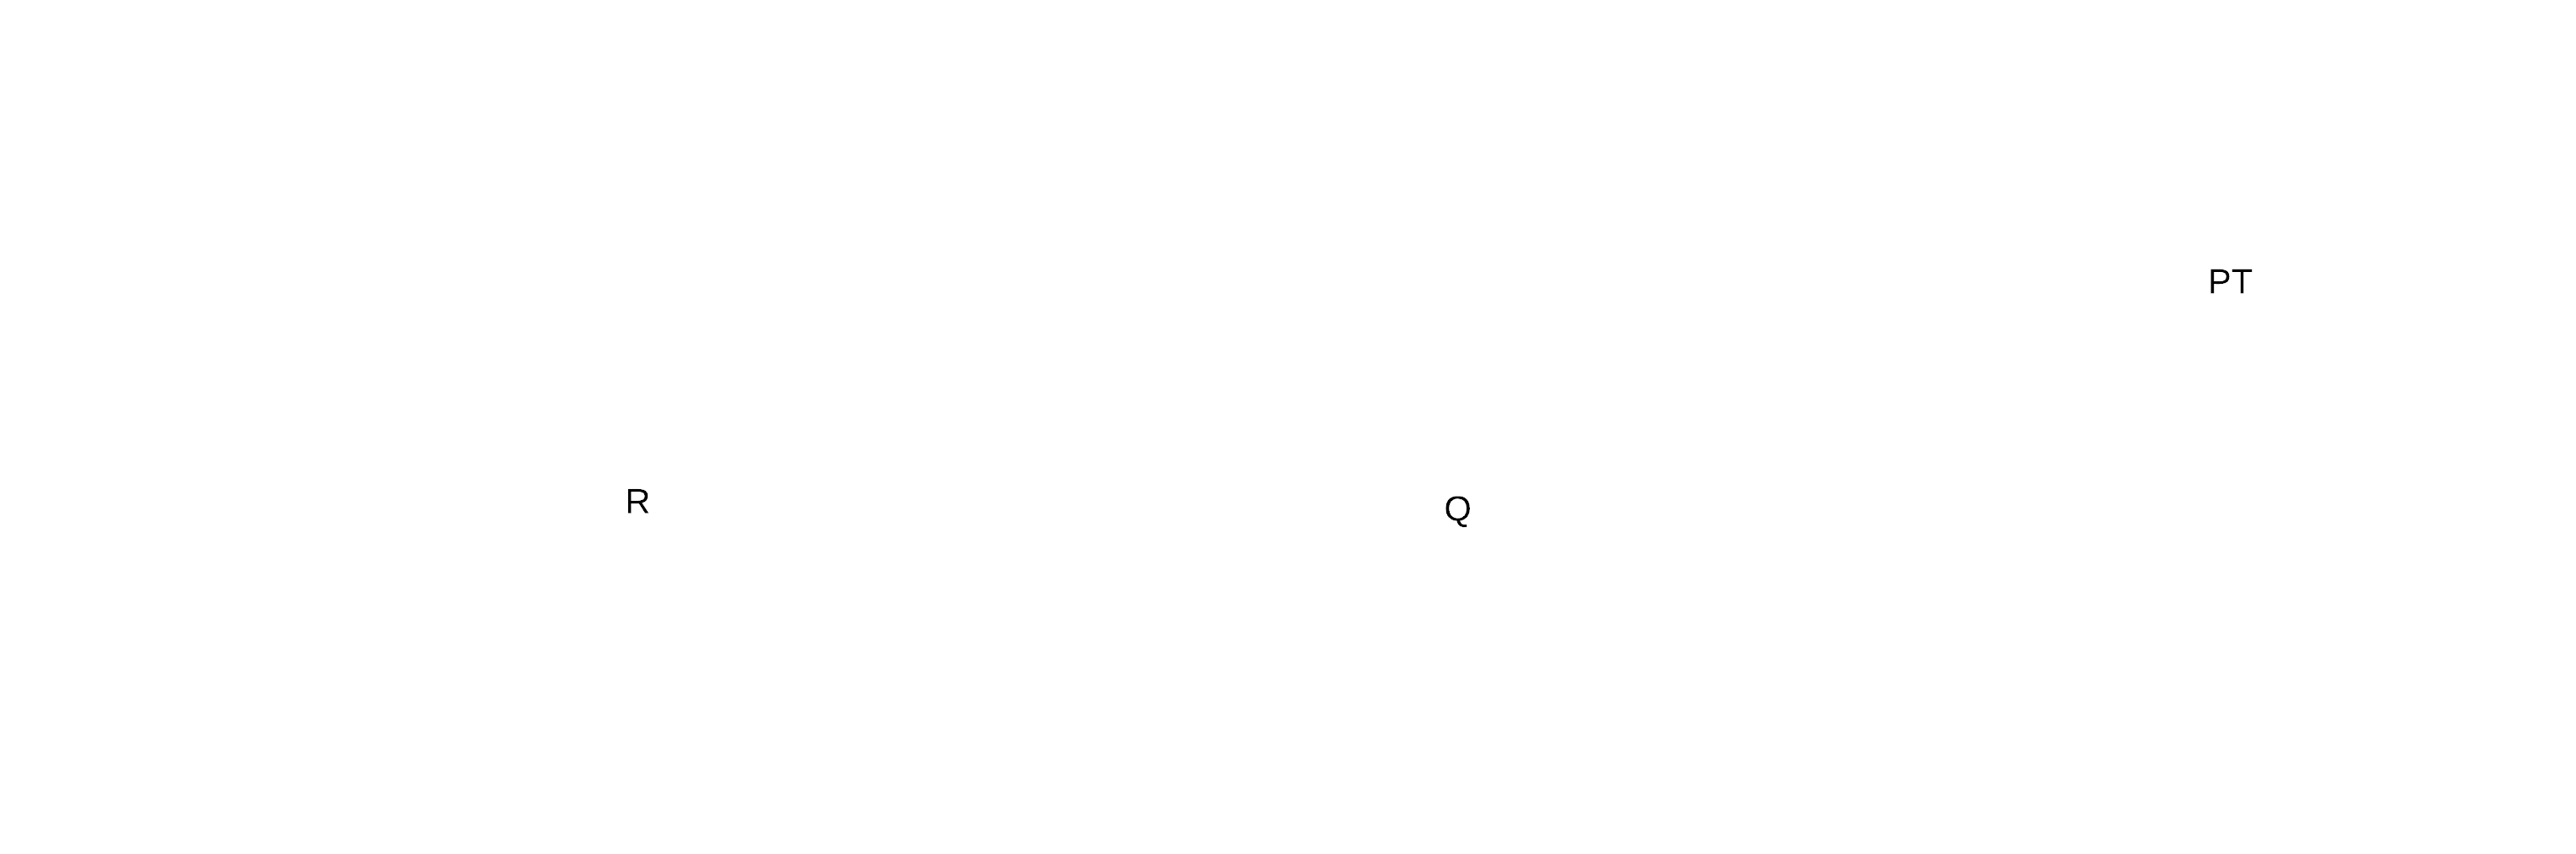

A expressão mostrada acima é uma **aproximação** sempre que **k é menor que m**, ou seja, que são selecionados menos fatores latentes do que todos os existentes. Esse produto tem como resultado **a melhor aproximação de posto k** da matriz R, e permite observar padrões latentes que eram de mais difícil percepção ao observar a matriz R como um todo.

Uma interpretação desse método é que os filmes e usuários são projetados num espaço de k-dimensões, de acordo com esses fatores latentes que equivalem às direções de maior variabilidade dos dados, ou seja, as principais características que os distinguem nesse conjunto de dados.

## Acessando Data Sets

In [2]:
# Montando Drive para acessar data sets
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
import pandas as pd

# Converte os datasets em csv para DF do pandas
df_movies = pd.read_csv("drive/MyDrive/Datasets/ml-latest-small/movies.csv")
df_ratings = pd.read_csv("drive/MyDrive/Datasets/ml-latest-small/ratings.csv")

In [5]:
df_movies.shape

(9742, 3)

In [6]:
df_movies.head() #DF dos filmes, relação movieId - Título e gêneros

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [7]:
df_ratings.shape

(100836, 4)

In [8]:
df_ratings.head() #DF das avaliações

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

## Dividindo dados em treinamento e teste

In [9]:
# Dividindo o dataset original em dois: um de treinamento e um de teste

from sklearn.model_selection import train_test_split

df_treinamento, df_teste = train_test_split(df_ratings, test_size=0.2, random_state=42)

print("Número de linhas no DataFrame de treinamento:", len(df_treinamento))
print("Número de linhas no DataFrame de teste:", len(df_teste))

Número de linhas no DataFrame de treinamento: 80668
Número de linhas no DataFrame de teste: 20168


In [10]:
df_treinamento.head()

userId  movieId  rating   timestamp
80568     509     7347     3.0  1435994597
50582     326    71462     4.0  1322252335
8344       57     2115     3.0   965798155
99603     610     1127     4.0  1479544102
71701     462     2409     2.0  1174438249

In [11]:
df_teste.head()

userId  movieId  rating   timestamp
67037     432    77866     4.5  1335139641
42175     288      474     3.0   978465565
93850     599     4351     3.0  1498524542
6187       42     2987     4.0   996262677
12229      75     1610     4.0  1158989841

## Refatorando os datasets

O objetivo é criar uma matriz onde nas linhas estão os filmes e nas colunas estão os usuários. A matriz que será decomposta e reconstruída deve conter apenas as informações do conjunto de dados de treinamento.

In [12]:
# Obtendo matriz com todas as avaliações (treinamento + teste), filmes nas linhas e usuários nas colunas
mat_allratings = df_ratings.pivot(index='movieId', columns='userId', values='rating')

In [13]:
mat_allratings

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[9724 rows x 610 columns]

Temos 9724 filmes e 610 usuários.

In [14]:
# Calculando quantidade de valores faltantes na matriz
nan_quant = (mat_allratings.shape[0] * mat_allratings.shape[1]) - df_ratings.shape[0]
print("Número de valores faltantes na matriz: ", nan_quant)
print("Porcentagem que esses valores representam da matriz: ", (nan_quant/(mat_allratings.shape[0] * mat_allratings.shape[1])) * 100)

Número de valores faltantes na matriz:  5830804
Porcentagem que esses valores representam da matriz:  98.30003169443864


98% da matriz de referência é preenchida por NaN, ou seja, se trata de uma matriz esparsa. A etapa mais importante da construção desse sistema de recomendação será o pré-processamente referente a esses valores faltantes.

In [15]:
mat_treinamento = df_treinamento.pivot(index='movieId', columns='userId', values='rating')
mat_treinamento

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  NaN  NaN  4.5  NaN  NaN  NaN  ...  NaN  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  NaN  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8983 rows x 610 columns]

Pelo número de linhas, repara-se que certos filmes não estão no dataset de treinamento, pois todas as avaliações desse item foram para o teste.  Mas, é importante que essas linhas estejam presentes na matriz.

In [16]:
import numpy as np

# Encontrando os índices das linhas que estão faltando
buracos = list(set(mat_allratings.index) - set(mat_treinamento.index))

# Criando um DataFrame contendo apenas NaN para preencher os buracos
df_buracos = pd.DataFrame(index=buracos, columns=mat_treinamento.columns)

print(df_buracos.shape)

# Concatenando o DataFrame original com o DataFrame de buracos e reordenando os índices
mat_treinamento = pd.concat([mat_treinamento, df_buracos]).sort_index()

mat_treinamento

(741, 610)


userId  1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
1       4.0  NaN  NaN  NaN  NaN  NaN  4.5  NaN  NaN  NaN  ...  NaN  NaN  4.0   
2       NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3       4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4       NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193583  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193585  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193587  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193609  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId  604  605  606  607  608  609  610  
1       3.0  4.0  2.5  NaN  2.5  3.0  5.0  
2       5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3       NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5       3.0  NaN  NaN  NaN  NaN  NaN  NaN  
...     ...  ...  ...  ...  ...  ...  ...  
193581  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193583  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193585  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193587  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193609  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[9724 rows x 610 columns]

## Computando o SVD

In [17]:
import numpy as np

Calcular o SVD da matriz de avaliações exatamente do jeito que ela está agora é impossível. **O SVD não pode ser calculado a partir de uma matriz com valores faltantes (NaN).**

Dessa forma, é necessário um ajuste. Serão testadas trẽs formas de **imputação**, nas quais os valores faltantes vão ser preenchidos com:

- 0;
- média das colunas;
- média entre os 5 vizinhos mais próximos pelo algoritmo k-NN

### Imputando com valor nulo

In [18]:
# Abordagem substituindo os NaN com 0

U, Sigma, VT = np.linalg.svd(mat_treinamento.fillna(0), full_matrices=False)

In [19]:
U.shape

(9724, 610)

In [20]:
U

array([[-7.21922339e-02, -1.21951009e-02,  7.70795828e-02, ...,
         2.66361562e-03,  9.68491677e-03,  2.44802881e-02],
       [-4.05655966e-02,  7.91835865e-04,  4.69630786e-02, ...,
         3.01160458e-02, -5.44366931e-02, -1.46772448e-01],
       [-1.53069718e-02, -2.15374131e-02,  1.19462846e-02, ...,
         5.50161328e-02,  3.89132342e-02,  8.96128189e-04],
       ...,
       [-8.69838816e-05,  7.32987373e-04, -2.46704300e-04, ...,
        -7.88699200e-04,  2.58792843e-04,  3.26820142e-04],
       [-8.69838816e-05,  7.32987373e-04, -2.46704300e-04, ...,
        -7.88699200e-04,  2.58792843e-04,  3.26820142e-04],
       [-3.28044545e-04,  1.52520437e-03, -1.53489385e-04, ...,
         3.67919450e-03,  8.03289324e-04,  2.40074731e-03]])

In [21]:
Sigma.shape

(610,)

In [22]:
VT.shape

(610, 610)

O número de fatores latentes escolhido é 2.

In [23]:
#escolhendo 2 fatores latentes, reconstrói-se a matriz a partir deles
k = 2

Q = U[:, :k] #seleciona-se as k primeiras colunas de U

PT = np.dot(np.diag(Sigma[:k]), VT[:k, :]) #seleciona as k primeiras linhas de VT e multiplica por uma matriz diagonal com os k primeiros valores singulares

reconstructed_matrix = np.dot(Q, PT) #reconstrói-se a matriz multiplicando Q e PT

print(reconstructed_matrix)

# Essa matriz reconstruída é a melhor aproximação de posto k da matriz R

[[ 1.93807909e+00  1.58397023e-01  4.41727811e-02 ...  3.60769237e+00
   2.97497215e-01  3.89258214e+00]
 [ 1.00076990e+00  1.14500144e-01  2.22339985e-02 ...  2.00869005e+00
   1.48954459e-01  2.48876489e+00]
 [ 6.29737234e-01 -2.96215029e-02  1.57799818e-02 ...  8.10834080e-01
   1.08230105e-01  7.79276506e-02]
 ...
 [-6.29710995e-03  2.68447441e-03 -1.99821337e-04 ...  2.53633375e-03
  -1.42286601e-03  3.41773161e-02]
 [-6.29710995e-03  2.68447441e-03 -1.99821337e-04 ...  2.53633375e-03
  -1.42286601e-03  3.41773161e-02]
 [-9.44218945e-03  5.99135335e-03 -3.34220975e-04 ...  1.25659558e-02
  -2.41391789e-03  8.00247869e-02]]


In [24]:
# # E se eu usar os dois primeiros componentes principais de X?

# from sklearn.decomposition import PCA

# # Calculando o PCA
# pca = PCA(n_components=k)
# df_refatorado_pca = pca.fit_transform(df_refatorado.fillna(media_colunas))

# # Reconstruindo a matriz
# reconstructed_matrix = pca.inverse_transform(df_refatorado_pca)

In [25]:
#obtendo um DF a partir da matriz reconstruída
df_reconstruido = pd.DataFrame(reconstructed_matrix, columns=mat_treinamento.columns)

In [26]:
df_reconstruido = df_reconstruido.set_index(mat_treinamento.index)

In [27]:
df_reconstruido

userId       1         2         3         4         5         6         7    \
1       1.938079  0.158397  0.044173  1.063673  0.425026  1.116381  0.928043   
2       1.000770  0.114500  0.022234  0.522076  0.206380  0.540626  0.533950   
3       0.629737 -0.029622  0.015780  0.412987  0.170559  0.451601  0.165853   
4       0.047200 -0.005968  0.001249  0.034068  0.014284  0.037956  0.006159   
5       0.323738  0.001713  0.007814  0.198236  0.080901  0.213598  0.113611   
...          ...       ...       ...       ...       ...       ...       ...   
193581 -0.007197  0.003068 -0.000228 -0.006987 -0.003042 -0.008152  0.002672   
193583 -0.006297  0.002684 -0.000200 -0.006114 -0.002661 -0.007133  0.002338   
193585 -0.006297  0.002684 -0.000200 -0.006114 -0.002661 -0.007133  0.002338   
193587 -0.006297  0.002684 -0.000200 -0.006114 -0.002661 -0.007133  0.002338   
193609 -0.009442  0.005991 -0.000334 -0.010801 -0.004778 -0.012850  0.006796   

userId       8         9         10   ...       601       602       603  \
1       0.509461  0.231670  0.348595  ...  0.885545  0.880147  3.228027   
2       0.254661  0.131506  0.236639  ...  0.557464  0.426656  1.538614   
3       0.186390  0.045829 -0.027137  ...  0.039344  0.354974  1.366828   
4       0.014934  0.002074 -0.008524  ... -0.008532  0.029795  0.117143   
5       0.091464  0.029712  0.015382  ...  0.072120  0.168074  0.636241   
...          ...       ...       ...  ...       ...       ...       ...   
193581 -0.002832  0.000467  0.005036  ...  0.007911 -0.006379 -0.026322   
193583 -0.002478  0.000409  0.004407  ...  0.006922 -0.005581 -0.023032   
193585 -0.002478  0.000409  0.004407  ...  0.006922 -0.005581 -0.023032   
193587 -0.002478  0.000409  0.004407  ...  0.006922 -0.005581 -0.023032   
193609 -0.004221  0.001327  0.010012  ...  0.016402 -0.010042 -0.042245   

userId       604       605       606       607       608       609       610  
1       0.483036  0.930999  3.769327  1.211926  3.607692  0.297497  3.892582  
2       0.234562  0.533882  1.986488  0.618185  2.008690  0.148954  2.488765  
3       0.193804  0.170765  1.125315  0.412681  0.810834  0.108230  0.077928  
4       0.016229  0.006710  0.079749  0.031805  0.044070  0.008647 -0.049017  
5       0.091933  0.115311  0.599283  0.208206  0.492341  0.053223  0.288019  
...          ...       ...       ...       ...       ...       ...       ...  
193581 -0.003455  0.002483 -0.009513 -0.005352  0.002899 -0.001626  0.039060  
193583 -0.003023  0.002173 -0.008324 -0.004683  0.002536 -0.001423  0.034177  
193585 -0.003023  0.002173 -0.008324 -0.004683  0.002536 -0.001423  0.034177  
193587 -0.003023  0.002173 -0.008324 -0.004683  0.002536 -0.001423  0.034177  
193609 -0.005427  0.006452 -0.010070 -0.007480  0.012566 -0.002414  0.080025  

[9724 rows x 610 columns]

Para avaliar o modelo, serão comparados os valores do dataset de teste com suas correspondentes previsões na matriz reconstruída.

In [28]:
# Inicialize uma lista vazia para armazenar os valores
previsoes = []

# Iterar sobre as linhas do DataFrame de teste
for index, row in df_teste.iterrows():
  previsoes.append(df_reconstruido[int(row['userId'])][int(row['movieId'])])

# Converter a lista de valores em um array numpy
array_valores = np.array(previsoes)

In [29]:
# Calculando o RMSE (Root Mean Squared Error)

from sklearn.metrics import mean_squared_error

ratings_teste = np.array(df_teste['rating'])
rmse = np.sqrt(mean_squared_error(ratings_teste, previsoes))
print("rmse = ", rmse)

rmse =  3.0641261891643525


### Imputando com média da coluna

In [30]:
# Abordagem substituindo os NaN com as médias de cada coluna

media_colunas = mat_treinamento.mean() #Calcula as médias dos valores de cada coluna
media_colunas = media_colunas.fillna(0) #Algumas colunas não tem valores, nesse caso preenche com 0

U_col, Sigma_col, VT_col = np.linalg.svd(mat_treinamento.fillna(media_colunas), full_matrices=False)

In [31]:
#escolhendo 2 fatores latentes, reconstrói-se a matriz a partir deles
k = 2

Q_col = U_col[:, :k] #seleciona-se as k primeiras colunas de U

PT_col = np.dot(np.diag(Sigma_col[:k]), VT_col[:k, :]) #seleciona as k primeiras linhas de VT e multiplica por uma matriz diagonal com os k primeiros valores singulares

reconstructed_matrix_col = np.dot(Q_col, PT_col) #reconstrói-se a matriz multiplicando Q e PT

# Essa matriz reconstruída é a melhor aproximação de posto k da matriz R

In [32]:
#obtendo um DF a partir da matriz reconstruída
df_reconstruido_col = pd.DataFrame(reconstructed_matrix_col, columns=mat_treinamento.columns)
df_reconstruido_col = df_reconstruido_col.set_index(mat_treinamento.index)

In [33]:
# Inicialize uma lista vazia para armazenar os valores
previsoes = []

# Iterar sobre as linhas do DataFrame de teste
for index, row in df_teste.iterrows():
  previsoes.append(df_reconstruido_col[int(row['userId'])][int(row['movieId'])])

# Converter a lista de valores em um array numpy
array_valores = np.array(previsoes)

In [34]:
# Calculando o RMSE (Root Mean Squared Error)

from sklearn.metrics import mean_squared_error

ratings_teste = np.array(df_teste['rating'])
rmse = np.sqrt(mean_squared_error(ratings_teste, previsoes))
print("rmse = ", rmse)

rmse =  0.9189443991900673


### Imputando com k-NN

In [35]:
from sklearn.impute import KNNImputer

# Inicializando o imputador KNN
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean', keep_empty_features=True)

# Imputando os valores na matriz de treinamento
ratings_matrix_imputed = imputer.fit_transform(mat_treinamento)

In [36]:
ratings_matrix_imputed

array([[4.        , 4.        , 3.        , ..., 2.5       , 3.        ,
        5.        ],
       [4.        , 4.1       , 2.6       , ..., 2.        , 3.        ,
        4.1       ],
       [4.        , 3.4       , 0.5       , ..., 2.        , 3.        ,
        3.4       ],
       ...,
       [3.2       , 3.6       , 2.58064516, ..., 3.6       , 3.29032258,
        3.7       ],
       [3.2       , 3.6       , 2.58064516, ..., 3.6       , 3.29032258,
        3.7       ],
       [4.6       , 4.        , 2.58064516, ..., 4.2       , 3.6       ,
        3.9       ]])

In [37]:
ratings_matrix_imputed.shape

(9724, 610)

In [38]:
df_imputadoknn = pd.DataFrame(ratings_matrix_imputed, index=mat_treinamento.index, columns = mat_treinamento.columns)

In [39]:
U, Sigma, VT = np.linalg.svd(df_imputadoknn, full_matrices=False)

#escolhendo 2 fatores latentes, reconstrói-se a matriz a partir deles
k = 2

Q = U[:, :k] #seleciona-se as k primeiras colunas de U

PT = np.dot(np.diag(Sigma[:k]), VT[:k, :]) #seleciona as k primeiras linhas de VT e multiplica por uma matriz diagonal com os k primeiros valores singulares

reconstructed_matrix = np.dot(Q, PT) #reconstrói-se a matriz multiplicando Q e PT

# Essa matriz reconstruída é a melhor aproximação de posto k da matriz R

#obtendo um DF a partir da matriz reconstruída
df_reconstruido = pd.DataFrame(reconstructed_matrix, columns=mat_treinamento.columns)
df_reconstruido = df_reconstruido.set_index(mat_treinamento.index)

In [40]:
# Inicialize uma lista vazia para armazenar os valores
previsoes = []

# Iterar sobre as linhas do DataFrame de teste
for index, row in df_teste.iterrows():
  previsoes.append(df_imputadoknn[int(row['userId'])][int(row['movieId'])])

# Converter a lista de valores em um array numpy
array_valores = np.array(previsoes)

ratings_teste = np.array(df_teste['rating'])
rmse = np.sqrt(mean_squared_error(ratings_teste, previsoes))
print("rmse = ", rmse)

rmse =  0.990136165347758


## Avaliando regiões de acerto



Para melhor compreensão do modelo, o treinamento será também avaliado.

In [41]:
# Extraindo índices das avaliações reais (diferentes de NaN)
non_nan_indices = ~np.isnan(mat_treinamento) # retorna o inverso da máscara gerada pelo isnan

non_nan_indices #matriz onde true indice avaliação real e false indica NaN

userId    1      2      3      4      5      6      7      8      9      10   \
1        True  False  False  False  False  False   True  False  False  False   
2       False  False  False  False  False   True  False   True  False  False   
3        True  False  False  False  False   True  False  False  False  False   
4       False  False  False  False  False   True  False  False  False  False   
5       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
193581  False  False  False  False  False  False  False  False  False  False   
193583  False  False  False  False  False  False  False  False  False  False   
193585  False  False  False  False  False  False  False  False  False  False   
193587  False  False  False  False  False  False  False  False  False  False   
193609  False  False  False  False  False  False  False  False  False  False   

userId  ...    601    602    603    604    605    606    607    608    609  \
1       ...  False  False   True   True   True   True  False   True   True   
2       ...  False   True  False   True   True  False  False   True  False   
3       ...  False  False  False  False  False  False  False   True  False   
4       ...  False  False  False  False  False  False  False  False  False   
5       ...  False  False  False   True  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
193581  ...  False  False  False  False  False  False  False  False  False   
193583  ...  False  False  False  False  False  False  False  False  False   
193585  ...  False  False  False  False  False  False  False  False  False   
193587  ...  False  False  False  False  False  False  False  False  False   
193609  ...  False  False  False  False  False  False  False  False  False   

userId    610  
1        True  
2       False  
3       False  
4       False  
5       False  
...       ...  
193581  False  
193583  False  
193585  False  
193587  False  
193609  False  

[9724 rows x 610 columns]

In [42]:
mat_treinamento.head()

userId  1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
1       4.0  NaN  NaN  NaN  NaN  NaN  4.5  NaN  NaN  NaN  ...  NaN  NaN  4.0   
2       NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3       4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4       NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId  604  605  606  607  608  609  610  
1       3.0  4.0  2.5  NaN  2.5  3.0  5.0  
2       5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3       NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5       3.0  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 610 columns]

In [43]:
df_imputadoknn.head()

userId  1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
1       4.0  4.0  3.0  4.2  4.0  3.8  4.5  4.4  3.4  3.8  ...  4.1  3.6  4.0   
2       4.0  4.1  2.6  2.0  3.0  4.0  3.0  4.0  2.8  3.8  ...  4.1  4.0  3.4   
3       4.0  3.4  0.5  4.2  3.2  5.0  1.5  3.6  3.0  2.9  ...  4.2  3.4  4.6   
4       4.4  3.0  0.5  2.4  2.8  3.0  2.4  2.6  3.8  2.7  ...  3.9  3.4  2.8   
5       4.0  4.4  1.7  3.6  3.4  3.4  1.7  2.8  2.6  2.9  ...  4.3  3.2  2.2   

userId  604  605  606  607  608  609  610  
1       3.0  4.0  2.5  3.8  2.5  3.0  5.0  
2       5.0  3.5  3.7  3.8  2.0  3.0  4.1  
3       3.2  3.2  4.2  3.6  2.0  3.0  3.4  
4       3.4  3.2  3.3  3.6  2.2  3.2  3.4  
5       3.0  2.8  3.3  3.4  2.8  3.2  3.4  

[5 rows x 610 columns]

In [44]:
# Extrair as avaliações reais do DF de avaliações e a reconstrução desses valores na matriz de predição
real_ratings = mat_treinamento[non_nan_indices]
predicted_real_ratings = df_reconstruido[non_nan_indices]

# Preenchendo com -1 no lugar de NaN
real_ratings_filled = real_ratings.fillna(-1)
predicted_real_ratings_filled = predicted_real_ratings.fillna(-1)

In [45]:
real_ratings_array = real_ratings_filled.values.flatten() # Obtém um array com os valores do df
real_ratings_array = real_ratings_array[real_ratings_array != -1] # Retira os -1's do array

predicted_real_ratings_array = predicted_real_ratings_filled.values.flatten() # Obtém um array com os valores do df
predicted_real_ratings_array = predicted_real_ratings_array[predicted_real_ratings_array != -1] # Retira os -1's do array

In [46]:
real_ratings_array

array([4. , 4.5, 2.5, ..., 3.5, 3.5, 4. ])

In [47]:
predicted_real_ratings_array

array([4.44855719, 3.45839202, 3.55039574, ..., 3.75151913, 3.75151913,
       3.89830972])

In [48]:
# Calculando o RMSE (Root Mean Squared Error)

rmse = np.sqrt(mean_squared_error(real_ratings_array, predicted_real_ratings_array))
print("rmse = ", rmse)

rmse =  0.8383898754299791


Significa que o modelo obteve um RMSE de 0.83 na predição dos valores do treinamento.

Gerando um gráfico de dispersão com as avaliações reais e as previsões para visualizar os erros e acertos:

No treinamento:

In [49]:
import plotly.express as px
import plotly.graph_objects as go

# Cria um DF com as avaliações reais e as previsões correspondentes
df_real_ratings_predictions = pd.DataFrame({'Avaliações Reais': real_ratings_array, 'Previsões': predicted_real_ratings_array})

# Cria o gráfico de dispersão
fig = px.scatter(df_real_ratings_predictions, x='Avaliações Reais', y='Previsões', title='Gráfico de Dispersão - Avaliações Reais vs. Previsões (Treinamento)')

# Adiciona a linha x=y para auxiliar na visualização
fig.add_trace(go.Scatter(x=[0, 5], y=[0, 5], mode='lines', name='y=x'))

# Adiciona título aos eixos
fig.update_layout(xaxis_title='Avaliações Reais', yaxis_title='Previsões')

fig.show()


No teste:

In [50]:
# Cria um DF com as avaliações reais e as previsões correspondentes
df_teste_ratings_predictions = pd.DataFrame({'Avaliações Reais': ratings_teste, 'Previsões': previsoes})

# Cria o gráfico de dispersão
fig = px.scatter(df_teste_ratings_predictions, x='Avaliações Reais', y='Previsões', title='Gráfico de Dispersão - Avaliações Reais vs. Previsões (Teste)')

# Adiciona a linha x=y para auxiliar na visualização
fig.add_trace(go.Scatter(x=[0, 5], y=[0, 5], mode='lines', name='y=x'))

# Adiciona título aos eixos
fig.update_layout(xaxis_title='Avaliações Reais', yaxis_title='Previsões')

fig.show()

Nota-se que o modelo é pior em prever notas baixas, tanto no treinamento quanto no teste.

In [51]:
hist = px.histogram(x=real_ratings_array, title='Histograma das avaliações de treinamento')
hist.show()

Isso se explica pela baixa frequência de avaliações baixas (< 3), o que também é compatível com o comportamento dos usuários de forma geral: avaliar mais positivamente do que negativamente.

Logo, o modelo se mostra com maior dificuldade para prever notas baixas, devido a escassez dessas notas no conjunto de dados de treinamento (e de teste).

## Estudo de Caso



Para investigar a qualidade das predições e possíveis falhas, realizarei um estudo de caso com dois usuários: o que tiver mais avaliações disponíveis e o que tiver menos.

Para efeitos de comparação, extrairei os filmes classificados com 4 ou mais estrelas em suas avaliações reais, e compararei com os filmes não previamente avaliados e com 4 ou mais estrelas na previsão. Além de checar visualmente os ratings previstos.

  ### Usuário com mais avaliações disponíveis

In [52]:
mat_allratings

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[9724 rows x 610 columns]

In [53]:
#Encontrando o usuário com menos avaliações indisponíveis (NaN)

nan_counts = mat_allratings.isna().sum() #retorna uma matriz com a quantidade de NaN presentes em cada coluna do DF, com a id da coluna nos índices
column_with_least_nan = nan_counts.idxmin() #retorna índice que tiver a menor quantidade associada

print("Usuário com maior número de avaliações disponíveis:", column_with_least_nan)

Usuário com maior número de avaliações disponíveis: 414


In [54]:
# Extraindo as avaliações desse usuário e tirando as avaliações indisponíveis

column_user414 = mat_allratings[414] # coluna completa de avaliações do usuário

column_user414_non_na = column_user414.dropna() # coluna de avaliações reais do usuário
column_user414_non_na

movieId
1         4.0
2         3.0
3         4.0
5         2.0
6         3.0
         ... 
180045    4.0
180497    4.0
180985    3.5
184791    2.5
187595    3.5
Name: 414, Length: 2698, dtype: float64

In [55]:
# Extraindo os Id's dos filmes com nota igual ou maior a 4

filmes_preferidos_414_ids = column_user414_non_na[column_user414_non_na[:] >= 4].index

filmes_preferidos_414_ids

Index([     1,      3,     11,     17,     21,     32,     34,     39,     47,
           50,
       ...
       176423, 176751, 177593, 177615, 178061, 179817, 179819, 180031, 180045,
       180497],
      dtype='int64', name='movieId', length=1227)

In [56]:
# A partir dos Id's, obtendo os nomes e gêneros dos filmes

filmes_preferidos_414_nomes = df_movies[df_movies['movieId'].isin(filmes_preferidos_414_ids)]

filmes_preferidos_414_nomes

movieId                            title  \
0           1                 Toy Story (1995)   
2           3          Grumpier Old Men (1995)   
10         11   American President, The (1995)   
16         17     Sense and Sensibility (1995)   
20         21                Get Shorty (1995)   
...       ...                              ...   
9644   179817              Darkest Hour (2017)   
9645   179819  Star Wars: The Last Jedi (2017)   
9647   180031        The Shape of Water (2017)   
9648   180045              Molly's Game (2017)   
9654   180497                  The Post (2017)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
2                                  Comedy|Romance  
10                           Comedy|Drama|Romance  
16                                  Drama|Romance  
20                          Comedy|Crime|Thriller  
...                                           ...  
9644                                    Drama|War  
9645              Action|Adventure|Fantasy|Sci-Fi  
9647                      Adventure|Drama|Fantasy  
9648                                        Drama  
9654                               Drama|Thriller  

[1227 rows x 3 columns]

In [57]:
# Encontrando os filmes que não foram avaliados

column_user414_only_na = column_user414[column_user414.isna()] # retorna somente as avaliações indisponíveis desse usuário
filmes_nao_avaliados_414_ids = column_user414_only_na.index # retorna os Id's dos filmes não avaliados

filmes_nao_avaliados_414_nomes = df_movies[df_movies['movieId'].isin(filmes_nao_avaliados_414_ids)] # a partir dos Id's, obtém nomes e gêneros dos filmes não avaliados

filmes_nao_avaliados_414_nomes

movieId                                      title  \
3           4                   Waiting to Exhale (1995)   
8           9                        Sudden Death (1995)   
11         12         Dracula: Dead and Loving It (1995)   
12         13                               Balto (1995)   
13         14                               Nixon (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  
3                Comedy|Drama|Romance  
8                              Action  
11                      Comedy|Horror  
12       Adventure|Animation|Children  
13                              Drama  
...                               ...  
9737  Action|Animation|Comedy|Fantasy  
9738         Animation|Comedy|Fantasy  
9739                            Drama  
9740                 Action|Animation  
9741                           Comedy  

[7026 rows x 3 columns]

In [58]:
# Obtendo as previsões para o usuário 414
previsoes_user414 = df_reconstruido[414]

previsoes_user414

1         3.979952
2         3.198493
3         3.416439
4         2.994276
5         2.368314
            ...   
193581    3.710198
193583    3.623678
193585    3.623678
193587    3.623678
193609    3.976522
Name: 414, Length: 9724, dtype: float64

In [59]:
# Criando um DataFrame com as previsões para os filmes não avaliados
previsoes_nao_avaliadas_user414_df = previsoes_user414[previsoes_user414.index.isin(filmes_nao_avaliados_414_ids)]

# Adicionando uma coluna com as previsões ao dataframe com as informações dos filmes não avaliados
filmes_nao_avaliados_414_nomes['Previsões'] = previsoes_nao_avaliadas_user414_df.values

<ipython-input-59-381140ca23d3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
# Dataframe completo dos filmes não avaliados e suas previsões

filmes_nao_avaliados_414_nomes

movieId                                      title  \
3           4                   Waiting to Exhale (1995)   
8           9                        Sudden Death (1995)   
11         12         Dracula: Dead and Loving It (1995)   
12         13                               Balto (1995)   
13         14                               Nixon (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  Previsões  
3                Comedy|Drama|Romance   2.994276  
8                              Action   3.021000  
11                      Comedy|Horror   3.070792  
12       Adventure|Animation|Children   3.163086  
13                              Drama   3.616366  
...                               ...        ...  
9737  Action|Animation|Comedy|Fantasy   3.710198  
9738         Animation|Comedy|Fantasy   3.623678  
9739                            Drama   3.623678  
9740                 Action|Animation   3.623678  
9741                           Comedy   3.976522  

[7026 rows x 4 columns]

In [61]:
# Extraindo as linhas onde as previsões são de 4 ou mais estrelas

filmes_favoritos_nao_avaliados_414 = filmes_nao_avaliados_414_nomes[filmes_nao_avaliados_414_nomes['Previsões'] >= 4]
filmes_favoritos_nao_avaliados_414

movieId                                              title  \
48         53                                    Lamerica (1994)   
50         55                                     Georgia (1995)   
72         80        White Balloon, The (Badkonake sefid) (1995)   
87         99               Heidi Fleiss: Hollywood Madam (1995)   
94        106         Nobody Loves Me (Keiner liebt mich) (1994)   
...       ...                                                ...   
9726   190209                 Jeff Ross Roasts the Border (2017)   
9727   190213                                   John From (2015)   
9728   190215                                Liquid Truth (2017)   
9729   190219                                       Bunny (1998)   
9730   190221  Hommage à Zgougou (et salut à Sabine Mamou) (2...   

               genres  Previsões  
48    Adventure|Drama   4.338505  
50              Drama   4.170164  
72     Children|Drama   4.033180  
87        Documentary   4.123261  
94       Comedy|Drama   4.010484  
...               ...        ...  
9726           Comedy   4.288399  
9727            Drama   4.182626  
9728            Drama   4.183576  
9729        Animation   4.182626  
9730      Documentary   4.182626  

[1165 rows x 4 columns]

In [62]:
# Comparando previsões e avaliações reais com maiores notas

# Gênero mais presente nas avaliações reais - DF: filmes_preferidos_414_nomes

# Dividir as palavras e contar a ocorrência de cada uma
todos_generos1 = '|'.join(filmes_preferidos_414_nomes['genres']).split('|')
contagem_generos1 = pd.Series(todos_generos1).value_counts()

# Obter todas as palavras ordenadas por ocorrência
generos_ordenados1 = contagem_generos1.index.tolist()

# Visualizar todas as palavras em ordem de ocorrência
print("Gêneros de maior ocorrência nas maiores avaliações reais:")
print(generos_ordenados1)

Gêneros de maior ocorrência nas maiores avaliações reais:
['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Sci-Fi', 'Fantasy', 'Children', 'Animation', 'War', 'Mystery', 'Musical', 'Horror', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


In [63]:
# Comparando previsões e avaliações reais com maiores notas

# Gênero mais presente nas previsões - DF: filmes_favoritos_nao_avaliados_414

# Dividir as palavras e contar a ocorrência de cada uma
todos_generos2 = '|'.join(filmes_favoritos_nao_avaliados_414['genres']).split('|')
contagem_generos2 = pd.Series(todos_generos2).value_counts()

# Obter todas as palavras ordenadas por ocorrência
generos_ordenados2 = contagem_generos2.index.tolist()

# Visualizar todas as palavras em ordem de ocorrência
print("Gêneros de maior ocorrência nas maiores avaliações previstas:")
print(generos_ordenados2)

Gêneros de maior ocorrência nas maiores avaliações previstas:
['Drama', 'Comedy', 'Romance', 'Documentary', 'Thriller', 'Crime', 'Action', 'Animation', 'Horror', 'Adventure', 'War', 'Fantasy', 'Mystery', 'Sci-Fi', 'Children', 'Musical', 'Film-Noir', 'Western', '(no genres listed)', 'IMAX']


Há uma semelhança evidente entre os gêneros mais bem avaliados e os gêneros mais recomendados.

  ### Usuário com menos avaliações disponíveis

In [64]:
#Encontrando o usuário com mais avaliações indisponíveis (NaN)

column_with_most_nan = nan_counts.idxmax() #devolve índice que tiver a maior quantidade associada

print("Usuário com menor número de avaliações disponíveis:", column_with_most_nan)

Usuário com menor número de avaliações disponíveis: 53


In [65]:
# Extraindo as avaliações desse usuário e tirando as avaliações indisponíveis

column_user53 = mat_allratings[53] # coluna completa de avaliações do usuário

column_user53_non_na = column_user53.dropna() # coluna de avaliações reais do usuário
column_user53_non_na

movieId
203     5.0
249     5.0
381     5.0
413     5.0
481     5.0
748     5.0
880     5.0
916     5.0
922     5.0
1049    5.0
1100    5.0
1125    5.0
1256    5.0
1298    5.0
1441    5.0
1982    5.0
2616    5.0
2686    5.0
3100    5.0
4019    5.0
Name: 53, dtype: float64

In [66]:
# Extraindo os Id's dos filmes com nota igual ou maior a 4

filmes_preferidos_53_ids = column_user53_non_na[column_user53_non_na[:] >= 4].index

filmes_preferidos_53_ids

Index([ 203,  249,  381,  413,  481,  748,  880,  916,  922, 1049, 1100, 1125,
       1256, 1298, 1441, 1982, 2616, 2686, 3100, 4019],
      dtype='int64', name='movieId')

In [67]:
# A partir dos Id's, obtendo os nomes e gêneros dos filmes

filmes_preferidos_53_nomes = df_movies[df_movies['movieId'].isin(filmes_preferidos_53_ids)]

filmes_preferidos_53_nomes

movieId                                              title  \
171       203  To Wong Foo, Thanks for Everything! Julie Newm...   
213       249                            Immortal Beloved (1994)   
338       381                    When a Man Loves a Woman (1994)   
357       413                                    Airheads (1994)   
419       481                                  Kalifornia (1993)   
601       748                                Arrival, The (1996)   
668       880                   Island of Dr. Moreau, The (1996)   
698       916                               Roman Holiday (1953)   
704       922      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)   
801      1049                 Ghost and the Darkness, The (1996)   
838      1100                             Days of Thunder (1990)   
854      1125             Return of the Pink Panther, The (1975)   
955      1256                                   Duck Soup (1933)   
996      1298                        Pink Floyd: The Wall (1982)   
1108     1441                                Benny & Joon (1993)   
1459     1982                                   Halloween (1978)   
1971     2616                                  Dick Tracy (1990)   
2015     2686          Red Violin, The (Violon rouge, Le) (1998)   
2342     3100                    River Runs Through It, A (1992)   
3003     4019                           Finding Forrester (2000)   

                       genres  
171                    Comedy  
213             Drama|Romance  
338             Drama|Romance  
357                    Comedy  
419            Drama|Thriller  
601    Action|Sci-Fi|Thriller  
668           Sci-Fi|Thriller  
698      Comedy|Drama|Romance  
704   Drama|Film-Noir|Romance  
801          Action|Adventure  
838      Action|Drama|Romance  
854              Comedy|Crime  
955        Comedy|Musical|War  
996             Drama|Musical  
1108           Comedy|Romance  
1459                   Horror  
1971             Action|Crime  
2015            Drama|Mystery  
2342                    Drama  
3003                    Drama

In [68]:
# Encontrando os filmes que não foram avaliados

column_user53_only_na = column_user53[column_user53.isna()] # retorna somente as avaliações indisponíveis desse usuário
filmes_nao_avaliados_53_ids = column_user53_only_na.index # retorna os Id's dos filmes não avaliados

filmes_nao_avaliados_53_nomes = df_movies[df_movies['movieId'].isin(filmes_nao_avaliados_53_ids)] # a partir dos Id's, obtém nomes e gêneros dos filmes não avaliados

filmes_nao_avaliados_53_nomes

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9704 rows x 3 columns]

In [69]:
# Obtendo as previsões para o usuário 53
previsoes_user53 = df_reconstruido[53]

previsoes_user53

1         4.997732
2         5.027787
3         4.913659
4         4.917383
5         4.873618
            ...   
193581    4.970997
193583    4.984033
193585    4.984033
193587    4.984033
193609    4.996836
Name: 53, Length: 9724, dtype: float64

In [70]:
# Criando um DataFrame com as previsões para os filmes não avaliados
previsoes_nao_avaliadas_user53_df = previsoes_user53[previsoes_user53.index.isin(filmes_nao_avaliados_53_ids)]

# Adicionando uma coluna com as previsões ao dataframe com as informações dos filmes não avaliados
filmes_nao_avaliados_53_nomes['Previsões'] = previsoes_nao_avaliadas_user53_df.values

<ipython-input-70-3791285a237b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
# Dataframe completo dos filmes não avaliados e suas previsões

filmes_nao_avaliados_53_nomes

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  Previsões  
0     Adventure|Animation|Children|Comedy|Fantasy   4.997732  
1                      Adventure|Children|Fantasy   5.027787  
2                                  Comedy|Romance   4.913659  
3                            Comedy|Drama|Romance   4.917383  
4                                          Comedy   4.873618  
...                                           ...        ...  
9737              Action|Animation|Comedy|Fantasy   4.970997  
9738                     Animation|Comedy|Fantasy   4.984033  
9739                                        Drama   4.984033  
9740                             Action|Animation   4.984033  
9741                                       Comedy   4.996836  

[9704 rows x 4 columns]

In [72]:
# Extraindo as linhas onde as previsões são de 4 ou mais estrelas

filmes_favoritos_nao_avaliados_53 = filmes_nao_avaliados_53_nomes[filmes_nao_avaliados_53_nomes['Previsões'] >= 4]
filmes_favoritos_nao_avaliados_53

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  Previsões  
0     Adventure|Animation|Children|Comedy|Fantasy   4.997732  
1                      Adventure|Children|Fantasy   5.027787  
2                                  Comedy|Romance   4.913659  
3                            Comedy|Drama|Romance   4.917383  
4                                          Comedy   4.873618  
...                                           ...        ...  
9737              Action|Animation|Comedy|Fantasy   4.970997  
9738                     Animation|Comedy|Fantasy   4.984033  
9739                                        Drama   4.984033  
9740                             Action|Animation   4.984033  
9741                                       Comedy   4.996836  

[9704 rows x 4 columns]

In [73]:
# Comparando previsões e avaliações reais com maiores notas

# Gênero mais presente nas avaliações reais - DF: filmes_preferidos_53_nomes

# Dividir as palavras e contar a ocorrência de cada uma
todos_generos12 = '|'.join(filmes_preferidos_53_nomes['genres']).split('|')
contagem_generos12 = pd.Series(todos_generos12).value_counts()

# Obter todas as palavras ordenadas por ocorrência
generos_ordenados12 = contagem_generos1.index.tolist()

# Visualizar todas as palavras em ordem de ocorrência
print("Gêneros de maior ocorrência nas maiores avaliações reais:")
print(generos_ordenados12)

Gêneros de maior ocorrência nas maiores avaliações reais:
['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Sci-Fi', 'Fantasy', 'Children', 'Animation', 'War', 'Mystery', 'Musical', 'Horror', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


In [74]:
# Comparando previsões e avaliações reais com maiores notas

# Gênero mais presente nas previsões - DF: filmes_favoritos_nao_avaliados_53

# Dividir as palavras e contar a ocorrência de cada uma
todos_generos22 = '|'.join(filmes_favoritos_nao_avaliados_53['genres']).split('|')
contagem_generos22 = pd.Series(todos_generos22).value_counts()

# Obter todas as palavras ordenadas por ocorrência
generos_ordenados22 = contagem_generos22.index.tolist()

# Visualizar todas as palavras em ordem de ocorrência
print("Gêneros de maior ocorrência nas maiores avaliações previstas:")
print(generos_ordenados22)

Gêneros de maior ocorrência nas maiores avaliações previstas:
['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation', 'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX', 'Film-Noir', '(no genres listed)']


Apesar dos gêneros mais recomendados estarem de acordo com os mais bem avaliados pelo usuário, repara-se que o número de filmes mais recomendados (rating previsto maior que 4) é exatamente igual ao número de filmes não avaliados.

Isto se deve ao fato de que, não somente há poucas avaliações por esse usuário, mas também essas poucas são todas iguais a 5. Pela baixa representatividade dessas avaliações, é difícil prever o que desagradaria esse usuário.

## Plotando Gráficos

### Média da coluna

In [75]:
ids_filmes = df_ratings['movieId'].values # pegando os ids dos filmes avaliados para extrair títulos e gêneros
ids_filmes

array([     1,      3,      6, ..., 168250, 168252, 170875])

In [76]:
titulos_filmes = df_movies[df_movies['movieId'].isin(ids_filmes)]['title'].values # extraindo títulos
generos_filmes = df_movies[df_movies['movieId'].isin(ids_filmes)]['genres'].values # extraindo gêneros

In [77]:
Q_col_df = pd.DataFrame(Q_col)

# adicionando a coluna com títulos e gêneros
Q_col_df['title'] = titulos_filmes
Q_col_df['genres'] = generos_filmes

# criando uma tabela 'cor' para poder diferenciar alguns gêneros no gráfico
Q_col_df['Cor'] = Q_col_df['genres'].apply(lambda texto:
    'Children' if 'Children' in texto else
    'Horror' if 'Horror' in texto else
    'Romance' if 'Romance' in texto else
    'Action' if 'Action' in texto else
    'Other')
Q_col_df

0         1                                      title  \
0    -0.010343  0.037266                           Toy Story (1995)   
1    -0.010100 -0.013005                             Jumanji (1995)   
2    -0.010094 -0.002916                    Grumpier Old Men (1995)   
3    -0.010112 -0.001500                   Waiting to Exhale (1995)   
4    -0.010046 -0.026245         Father of the Bride Part II (1995)   
...        ...       ...                                        ...   
9719 -0.010142 -0.000057  Black Butler: Book of the Atlantic (2017)   
9720 -0.010140 -0.000002               No Game No Life: Zero (2017)   
9721 -0.010140 -0.000002                               Flint (2017)   
9722 -0.010140 -0.000002        Bungo Stray Dogs: Dead Apple (2018)   
9723 -0.010142  0.000053        Andrew Dice Clay: Dice Rules (1991)   

                                           genres       Cor  
0     Adventure|Animation|Children|Comedy|Fantasy  Children  
1                      Adventure|Children|Fantasy  Children  
2                                  Comedy|Romance   Romance  
3                            Comedy|Drama|Romance   Romance  
4                                          Comedy     Other  
...                                           ...       ...  
9719              Action|Animation|Comedy|Fantasy    Action  
9720                     Animation|Comedy|Fantasy     Other  
9721                                        Drama     Other  
9722                             Action|Animation    Action  
9723                                       Comedy     Other  

[9724 rows x 5 columns]

In [78]:
import plotly.express as px

fig = px.scatter(Q_col_df, x=0, y=1, color='Cor', title='Filmes no espaço latente 2D (imputando com média da coluna)', hover_data = ['title', 'genres'])
fig.update_traces(textposition='top center')
fig.show()

In [79]:
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir a dimensionalidade para dois componentes principais
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(mat_treinamento.fillna(media_colunas))

componentes_principais_df = pd.DataFrame(componentes_principais)
componentes_principais_df['title'] = titulos_filmes
componentes_principais_df['genres'] = generos_filmes

In [80]:
# atribui as mesmas cores aos mesmos gêneros como no gráfico anterior
componentes_principais_df['Cor'] = componentes_principais_df['genres'].apply(lambda texto:
    'Children' if 'Children' in texto else
    'Horror' if 'Horror' in texto else
    'Romance' if 'Romance' in texto else
    'Action' if 'Action' in texto else
    'Other'
)

fig = px.scatter(componentes_principais_df, x=0, y=1, color='Cor', title='Filmes no espaço dos componentes principais 2D (imputando com média da coluna)', hover_data = ['title','genres'])
fig.update_traces(textposition='top center')
fig.show()

In [81]:
# Obtendo a variância explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Calculando a variância explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Imprimindo as proporções de variância explicada por cada componente principal
print("Variância Explicada por Componente Principal:")
for i, explained_variance in enumerate(variance_explained, 1):
    print(f"Componente Principal {i}: {explained_variance:.4f}")

# Imprimindo a variância explicada acumulada
print("\nVariância Explicada Acumulada:")
for i, cumulative_variance in enumerate(cumulative_variance_explained, 1):
    print(f"Primeiros {i} Componentes Principais: {cumulative_variance:.4f}")

Variância Explicada por Componente Principal:
Componente Principal 1: 0.0550
Componente Principal 2: 0.0214

Variância Explicada Acumulada:
Primeiros 1 Componentes Principais: 0.0550
Primeiros 2 Componentes Principais: 0.0764


### k-NN

In [82]:
# A matriz Q tem as coordenadas dos filmes nesse espaço
Q_df = pd.DataFrame(Q) # pegando a um df a partir da matriz

# adicionando a coluna com títulos e gêneros
Q_df['title'] = titulos_filmes
Q_df['genres'] = generos_filmes

# criando uma tabela 'cor' para poder diferenciar alguns gêneros no gráfico
Q_df['Cor'] = Q_df['genres'].apply(lambda texto:
    'Children' if 'Children' in texto else
    'Horror' if 'Horror' in texto else
    'Romance' if 'Romance' in texto else
    'Action' if 'Action' in texto else
    'Other')
Q_df

0         1                                      title  \
0    -0.010541  0.010015                           Toy Story (1995)   
1    -0.009915 -0.007361                             Jumanji (1995)   
2    -0.009938 -0.000904                    Grumpier Old Men (1995)   
3    -0.009582 -0.010100                   Waiting to Exhale (1995)   
4    -0.008984 -0.022985         Father of the Bride Part II (1995)   
...        ...       ...                                        ...   
9719 -0.010272  0.004582  Black Butler: Book of the Atlantic (2017)   
9720 -0.010216  0.002510               No Game No Life: Zero (2017)   
9721 -0.010216  0.002510                               Flint (2017)   
9722 -0.010216  0.002510        Bungo Stray Dogs: Dead Apple (2018)   
9723 -0.010536  0.009954        Andrew Dice Clay: Dice Rules (1991)   

                                           genres       Cor  
0     Adventure|Animation|Children|Comedy|Fantasy  Children  
1                      Adventure|Children|Fantasy  Children  
2                                  Comedy|Romance   Romance  
3                            Comedy|Drama|Romance   Romance  
4                                          Comedy     Other  
...                                           ...       ...  
9719              Action|Animation|Comedy|Fantasy    Action  
9720                     Animation|Comedy|Fantasy     Other  
9721                                        Drama     Other  
9722                             Action|Animation    Action  
9723                                       Comedy     Other  

[9724 rows x 5 columns]

In [83]:
fig = px.scatter(Q_df, x=0, y=1, color='Cor', title='Filmes no espaço latente 2D (imputando com k-NN)', hover_data = ['title', 'genres'])
fig.update_traces(textposition='top center')
fig.show()

Não é possível interpretar cada fator latente, nem observar nenhum cluster em específico.

Diante disso, vamos plotar o gráfico dos 2 primeiros componentes principais.

In [84]:
import plotly.express as px
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir a dimensionalidade para dois componentes principais
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(df_imputadoknn)

componentes_principais_df = pd.DataFrame(componentes_principais)
componentes_principais_df['title'] = titulos_filmes
componentes_principais_df['genres'] = generos_filmes
componentes_principais_df

0         1                                      title  \
0     -5.026029 -1.477497                           Toy Story (1995)   
1      3.121781 -3.296613                             Jumanji (1995)   
2      1.548707 -3.900772                    Grumpier Old Men (1995)   
3      5.841075  0.337524                   Waiting to Exhale (1995)   
4     12.792176 -1.588963         Father of the Bride Part II (1995)   
...         ...       ...                                        ...   
9719  -2.001773 -1.035551  Black Butler: Book of the Atlantic (2017)   
9720  -1.172825 -0.796696               No Game No Life: Zero (2017)   
9721  -1.172825 -0.796696                               Flint (2017)   
9722  -1.172825 -0.796696        Bungo Stray Dogs: Dead Apple (2018)   
9723  -5.029054  0.474116        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9719              Action|Animation|Comedy|Fantasy  
9720                     Animation|Comedy|Fantasy  
9721                                        Drama  
9722                             Action|Animation  
9723                                       Comedy  

[9724 rows x 4 columns]

In [85]:
# atribui as mesmas cores aos mesmos gêneros como no gráfico anterior
componentes_principais_df['Cor'] = componentes_principais_df['genres'].apply(lambda texto:
    'Children' if 'Children' in texto else
    'Horror' if 'Horror' in texto else
    'Romance' if 'Romance' in texto else
    'Action' if 'Action' in texto else
    'Other'
)

fig = px.scatter(componentes_principais_df, x=0, y=1, color='Cor', title='Filmes no espaço dos componentes principais 2D  (imputando com k-NN)', hover_data = ['title','genres'])
fig.update_traces(textposition='top center')
fig.show()

In [86]:
# Obtendo a variância explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Calculando a variância explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Imprimindo as proporções de variância explicada por cada componente principal
print("Variância Explicada por Componente Principal:")
for i, explained_variance in enumerate(variance_explained, 1):
    print(f"Componente Principal {i}: {explained_variance:.4f}")

# Imprimindo a variância explicada acumulada
print("\nVariância Explicada Acumulada:")
for i, cumulative_variance in enumerate(cumulative_variance_explained, 1):
    print(f"Primeiros {i} Componentes Principais: {cumulative_variance:.4f}")

Variância Explicada por Componente Principal:
Componente Principal 1: 0.2074
Componente Principal 2: 0.0381

Variância Explicada Acumulada:
Primeiros 1 Componentes Principais: 0.2074
Primeiros 2 Componentes Principais: 0.2455


## Discutindo resultados

| Método de Imputação   | RMSE |
| --------------------- | ---- |
| Valor nulo            | 3.06 |
| Média da coluna       | 0.92 |
| k-NN                  | 0.99 |

Evidentemente a imputação com valor nulo foi a que gerou piores resultados, baseando-se na métrica RMSE. Como a matriz de treinamento era muito esparsa, a imputação de valores nulos faz com que os valores das avaliações reais percam influência na estrutura global dos dados. Desse modo, a matriz reconstruída possui muitas entradas com valores baixos, resultando no maior erro apresentado.

A estratégia de imputação que combinou precisão e efetividade foi pela média de cada coluna. Utilizando o algoritmo k-NN, foi obtido um RMSE praticamente igual (ligeiramente maior), mas às custas de um esforço computacional muito maior.

É interessante notar o impacto dessas duas estratégias de imputação no PCA. Em ambas, a matriz reconstruída tem uma estrutura muito complexa, o que leva a uma variância acumulada muito pequena nos dois primeiros componentes principais.